In [1]:
import pandas as pd
import numpy as np
import cv2
import glob
import skimage as sk

C:\Users\user\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
from scipy.misc import toimage
from skimage import io,transform
import os

In [3]:
from PIL import Image
from scipy import misc
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam, SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D,AveragePooling2D
from keras.utils import np_utils,to_categorical
from keras import layers,regularizers
from keras import backend as K

Using TensorFlow backend.


def dat_aug(lis,label):
    lis= list(lis)
    label= list(label)
    
    for i in range(len(lis)):
        img = np.fliplr(lis[i])
        k=label[i]
        path='../user/'+str(k)+'/'+str(k)+'-'+str(labeller[i])+'.jpg'
        flip=to_image(img)
        sk.io.imsave(path,flip)
        lis.append((img))
        label.append(label[i]-1)
    return np.array(lis), np.array(label)


test=h5py.File('C:/Users/user/datasets/test_signs.h5','r+')

train=h5py.File('C:/Users/user/Downloads/train_thumb.h5','r+')

In [4]:
ones= glob.glob("../user/1/*.jpg")
twos= glob.glob("../user/2/*.jpg")
threes= glob.glob("../user/3/*.jpg")

fours= glob.glob("../user/4/*.jpg")
fives= glob.glob("../user/5/*.jpg")

In [5]:
train= ones+twos+threes+fours+fives
thresh=137
train_img_data=[]
train_label_data=[]
len(train)
for img in train:
        img_read = io.imread(img)
        #print(img)
        img_read = transform.resize(img_read,(64,64), mode = 'constant')
        img_read=(img_read*255).astype('uint8')
        #print(type(img_read))
        gray = cv2.cvtColor(img_read, cv2.COLOR_BGR2GRAY)
        im_bw = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)[1]
        kernel = np.ones((5,5),np.float32)/25
        dst = cv2.filter2D(im_bw,-1,kernel)
        #plt.imshow(gray)
        
        train_img_data.append(np.array(dst))
        train_label_data.append(str(int(img[10])-(1)))
train_img_data= np.array(train_img_data)
train_label_data=np.array(train_label_data)

C:\Users\user\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [6]:
#train, label= dat_aug(train_img_data,train_label_data)
train=train_img_data
label=train_label_data

print(train_img_data.shape)
print(train_label_data.shape)

(504, 64, 64)
(504,)


<class 'numpy.ndarray'>


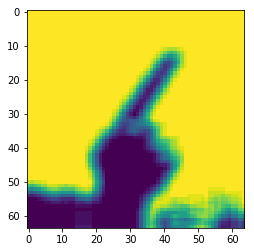

In [7]:
#thresh=137
#ims=cv2.threshold(train_img_data[56],thresh,255,cv2.THRESH_BINARY)[1] 
ims= train_img_data[56]
#ims= ims.astype('int32')
print(type(ims))
plt.imshow(ims)

In [8]:
x_train= train/255 
y_train=to_categorical(label)
#x_test=x_test/255
#train_label_dat= to_categorical(train_label_data,num_classes=5)
#y_test=  to_categorical(y_test)

In [46]:
print(model.predict(x_v))
print(y_v)

[[0.4906984  0.31100094 0.0143916  0.15530512 0.02860401]
 [0.12409981 0.5038632  0.04820308 0.0894696  0.23436424]
 [0.44940716 0.34823832 0.02324617 0.13718626 0.04192212]
 [0.04275687 0.22534016 0.02957685 0.46263647 0.23968962]
 [0.03974167 0.07799074 0.23051217 0.3851298  0.26662558]
 [0.31056532 0.5855265  0.01492536 0.06607543 0.02290731]
 [0.13660796 0.20322642 0.15588893 0.37650195 0.12777486]
 [0.10291229 0.28656134 0.12015358 0.1215113  0.36886153]
 [0.19709289 0.59451604 0.0108914  0.09702992 0.10046983]
 [0.09278645 0.69874454 0.00613546 0.14396507 0.05836846]]
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [38]:
img = glob.glob("../user/2/2-.jpg")
#for img in train_img_data[300:350]:
img_read = io.imread(img)
img_read = transform.resize(img_read,(64,64), mode = 'constant')
transformed_image= sk.transform.rotate(img, -17)
path= '../user/anshu.jpg'
sk.io.imsave(path, transformed_image)
plt.imshow(img)

AttributeError: 'list' object has no attribute 'read'

lis= []
for i in range(x_train.shape[0]):
    img=x_train[i]
    img=img*255
    img= img.astype('uint8')

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ## (2) Threshold
    th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

    ## (3) Find the min-area contour
    _cnts = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
    cnts = sorted(_cnts, key=cv2.contourArea)
    for cnt in cnts:
        if cv2.contourArea(cnt) > 100:
            break

    ## (4) Create mask and do bitwise-op
    mask = np.zeros(img.shape[:2],np.uint8)
    cv2.drawContours(mask, [cnt],-1, 255, -1)
    dst = cv2.bitwise_and(img, img, mask=mask)
    lis.append(threshed)
    
xn_train=np.array(lis)

lis2=[]
for i in range(x_test.shape[0]):
    img=x_test[i]
    img=img*255
    img= img.astype('uint8')

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ## (2) Threshold
    th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

    ## (3) Find the min-area contour
    _cnts = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
    cnts = sorted(_cnts, key=cv2.contourArea)
    for cnt in cnts:
        if cv2.contourArea(cnt) > 100:
            break

    ## (4) Create mask and do bitwise-op
    mask = np.zeros(img.shape[:2],np.uint8)
    cv2.drawContours(mask, [cnt],-1, 255, -1)
    dst = cv2.bitwise_and(img, img, mask=mask)
    lis2.append(threshed)
    
xn_test=np.array(lis2)

In [14]:
from sklearn.model_selection import train_test_split as tts
x_t,x_v,y_t,y_v=tts(x_train,y_train,test_size=0.15,random_state=101)


In [13]:
x_train=x_train.reshape(504,64,64,1)
x_train.shape

(504, 64, 64, 1)

In [47]:
model=Sequential()
model.add(Conv2D(32, (5,5),input_shape = (64, 64,1), activation = 'relu'))
model.add(AveragePooling2D((2,2),strides=2))

model.add(Conv2D(64, (5,5), activation = 'relu'))
model.add(AveragePooling2D((2,2),strides=2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(AveragePooling2D((2,2)))

#model.add(Conv2D(128, (3,3), activation = 'relu'))
#model.add(Conv2D(128, (3,3), activation=  'relu'))
#model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.40))
model.add(Dense(256, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(0.40))
model.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation = 'softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 60, 60, 32)        832       
_________________________________________________________________
average_pooling2d_2 (Average (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        51264     
_________________________________________________________________
average_pooling2d_3 (Average (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
__________

In [56]:
model.fit(x_t,y_t,validation_data=(x_v,y_v) ,epochs=2)


Train on 428 samples, validate on 76 samples
Epoch 1/2
428/428 [==============================] - 16s 37ms/step - loss: 0.6977 - acc: 0.8061 - val_loss: 0.7752 - val_acc: 0.7763
Epoch 2/2
428/428 [==============================] - 16s 37ms/step - loss: 0.6865 - acc: 0.8178 - val_loss: 0.8602 - val_acc: 0.7500


In [55]:
size=128,128
images= [cv2.resize(cv2.cvtColor(cv2.imread(file),cv2.COLOR_BGR2RGB),size,interpolation = cv2.INTER_LANCZOS4) for file in glob.glob("C:/Users/user/Desktop/sample/*.jpg")]


In [57]:
sample= glob.glob("C:/Users/user/Desktop/sample/*.jpg")
sam=[]
for img in sample:
        img_read = io.imread(img)
        img_read = transform.resize(img_read,(64,64), mode = 'constant')
        img= binary_mapping(img_read*255)
        sam.append(img)
      

    
sam=(np.array(sam))
sam = sam.reshape(len(sam),64,64,1)
print(model.predict_classes(np.array(sam)/255))
print(" 1 2 3 4 0 0 1 1 2 4 4 0 1 2 3 1 1 3 4 1 4 4 3 0 2 2 0 1 1")

[1 2 3 4 0 0 1 1 1 4 4 0 1 2 3 1 1 3 2 1 4 4 4 1 2 2 2 2 2]
 1 2 3 4 0 0 1 1 2 4 4 0 1 2 3 1 1 3 4 1 4 4 3 0 2 2 0 1 1


In [134]:
model_json = model.to_json()
with open("model4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model4.h5")
print("Saved model to disk")

Saved model to disk


In [10]:
class MinPooling2D(layers.MaxPooling2D):


  def __init__(self, pool_size=(2, 2), strides=None, 
               padding='valid', data_format=None, **kwargs):
    super(MaxPooling2D, self).__init__(pool_size, strides, padding,
                                       data_format, **kwargs)

  def pooling_function(inputs, pool_size, strides, padding, data_format):
    return -K.pool2d(-inputs, pool_size, strides, padding, data_format,
                                                         pool_mode='max')

In [29]:

print(model.predict_classes(x_t[55:65].reshape(10,64,64,1)))


[0 4 2 2 4 3 3 2 1 2]


In [10]:
from keras.models import model_from_json
import os

In [58]:
#json_file = open('model2.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
path='averagemodel.h5'
model.save(path)
print('Saved Model')

Saved Model


In [143]:
json_file.read()

'{"class_name": "Sequential", "config": {"name": "sequential_8", "layers": [{"class_name": "Conv2D", "config": {"name": "conv2d_22", "trainable": true, "batch_input_shape": [null, 128, 128, 3], "dtype": "float32", "filters": 32, "kernel_size": [5, 5], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_20", "trainable": true, "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "data_format": "channels_last"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_23", "trainable": true, "filters": 64

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


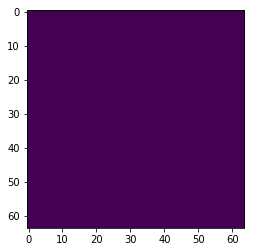

In [42]:
print(sam[23][35])
plt.imshow((sam[23]).reshape(64,64))

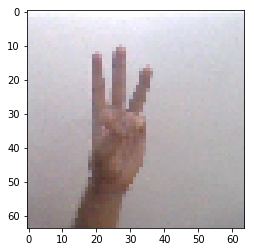

In [229]:
img= train_img_data[250]
plt.imshow(img)

In [19]:
def binary_mapping(im):
    img_read= im.astype('uint8')
    gray = cv2.cvtColor(img_read, cv2.COLOR_BGR2GRAY)
    im_bw = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)[1]
    kernel = np.ones((5,5),np.float32)/25
    dst = cv2.filter2D(im_bw,-1,kernel)
    binary_im=np.array(dst)
    
    return binary_im
        

In [38]:
import cv2

In [39]:
'''
for i in range (240,250):
    plt.subplot(331+(i-240))
    img= np.array(new_train[i])
    plt.imshow(img)
    
print(y_label[258])
'''
#th2=np.array(binary_mpping(img))
#print(type(img[9][9]))
#print(type(th2[9][9][2]))
#th2 = np.full((64,64,3), 12, np.uint8)
img=train_img_data[23]
img=img.astype('uint8')
#th2=toimage(th2)
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(th2)
#(thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
thresh=135
#im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]
#blur= cv2.GaussianBlur(im_bw,(5,5),0)
plt.imshow(im_gray)
#sk.io.imsave('../user/anshu.jpg',blur)


error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


In [12]:
new_train=train/255
y_label= to_categorical(label)

In [13]:
print(new_train.shape)
print(y_label.shape)

(504, 64, 64)
(504, 5)


im=train_img_data[229]*255
im= np.array(binary_mapping((im)))
k= im[:,:,0]
#k= cv2.GaussianBlur(k,(3,3),255)
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(k,-1,kernel)

print(k.shape)
plt.imshow(dst)

In [14]:
x_train= new_train.reshape(504,64,64,1)
y_train=y_label
#x_train=x_train.reshape(504,128,128,1)
print(x_train.shape)
print(y_train.shape)

(504, 64, 64, 1)
(504, 5)


In [15]:
x_t,x_v,y_t,y_v=tts(x_train,y_train,test_size=0.15,random_state=101)

In [16]:
bmodel=Sequential()
bmodel.add(Conv2D(32, (5,5),input_shape = (64, 64,1), activation = 'relu'))
bmodel.add(MinPooling2D((2,2),strides=2))

bmodel.add(Conv2D(64, (5,5), activation = 'relu'))
bmodel.add(MinPooling2D((2,2),strides=2))

bmodel.add(Conv2D(64, (3,3), activation = 'relu'))
bmodel.add(MinPooling2D((2,2)))

#bmodel.add(Conv2D(128, (3,3), activation = 'relu'))
#bmodel.add(Conv2D(128, (3,3), activation=  'relu'))
#bmodel.add(MaxPooling2D((2,2)))

bmodel.add(Flatten())

bmodel.add(Dropout(0.40))
bmodel.add(Dense(256, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
#bmodel.add(Dropout(0.40))
bmodel.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
bmodel.add(Dense(5, activation = 'softmax'))
bmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
bmodel.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 32)        832       
_________________________________________________________________
min_pooling2d_1 (MinPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        51264     
_________________________________________________________________
min_pooling2d_2 (MinPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
min_pooling2d_3 (MinP

In [19]:
bmodel.fit(x_t,y_t,validation_data=(x_v,y_v) ,epochs=5)

Train on 428 samples, validate on 76 samples
Epoch 1/5
428/428 [==============================] - 19s 44ms/step - loss: 0.8976 - acc: 0.7477 - val_loss: 1.0733 - val_acc: 0.6316
Epoch 2/5
428/428 [==============================] - 19s 43ms/step - loss: 0.7941 - acc: 0.7734 - val_loss: 1.0604 - val_acc: 0.6184
Epoch 3/5
428/428 [==============================] - 19s 43ms/step - loss: 0.8389 - acc: 0.7523 - val_loss: 0.8842 - val_acc: 0.7632
Epoch 4/5
428/428 [==============================] - 19s 43ms/step - loss: 0.7434 - acc: 0.8201 - val_loss: 0.8514 - val_acc: 0.7368
Epoch 5/5
428/428 [==============================] - 19s 43ms/step - loss: 0.6762 - acc: 0.8388 - val_loss: 1.0133 - val_acc: 0.7368


C:\Users\user\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


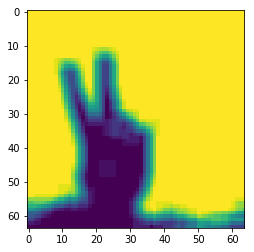

In [20]:
sample= glob.glob("C:/Users/user/Desktop/sample/*.jpg")
sam=[]
for img in sample:
        img_read = io.imread(img)
        img_read = transform.resize(img_read,(64,64), mode = 'constant')
        img_read= list(binary_mapping(img_read*255))
        sam.append(img_read)
      
sam=np.array(sam)
plt.imshow(sam[0])


In [21]:
y_pred= bmodel.predict_classes((sam/255).reshape(len(sam),64,64,1))
lis=[1, 2, 3, 4, 0, 0, 1, 1, 2, 4, 4, 0, 1, 2, 3, 1, 1, 3, 4 ,1, 4, 4, 3, 0, 2, 2, 0, 1, 1]

In [22]:
print(y_pred==lis)

[ True False  True  True  True False False  True  True  True  True  True
 False  True  True  True  True  True  True  True False  True False False
  True  True False False False]


In [23]:
model.save_weights("modelbinary64.h5")
print("Saved model to disk")

Saved model to disk


In [180]:
three= glob.glob("../user/3/*.jpg")
t_label=[]
t_train=[]
for img in three:
        img_read = io.imread(img)
        img_read = transform.resize(img_read,(64,64), mode = 'constant')
        t_train.append(img_read)
        t_label.append(str(int(img[10])-(1)))
        


len(t_train)
#x_t=list(x_t).append(t_train[100:150])
#x_t=np.array(x_t)
#for image in 
#img = np.flip(image,axis=1)

130

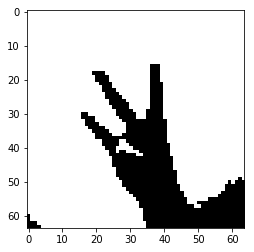

In [147]:
plt.imshow(binary_mapping(t_train[110]*255))

In [352]:
bmodel.predict_classes(new_train[200:300].reshape(100,64,64,1))

NameError: name 'count' is not defined

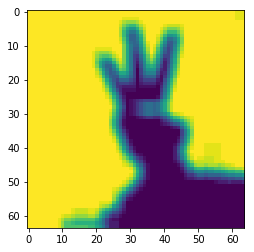

In [350]:
plt.imshow(new_train[223])

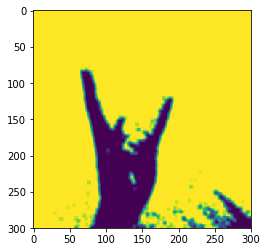

In [58]:
img =cv2.imread("../user/2/2-24.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)[1]
kernel = np.ones((5,5),np.float32)/25
img = cv2.filter2D(img,-1,kernel)
plt.imshow(img)
sk.io.imsave('../user/anshu.jpg',img)